<a href="https://colab.research.google.com/github/Vojinovic-M/python-predicting-real-estate-prices-amsterdam/blob/main/Amsterdam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

****

> **PREDICTING REAL ESTATE PRICES IN AMSTERDAM**

****


# **1. Problem Definition:**
**We are using machine learning techniques to make educated guesses about real estate prices in Amsterdam.**

 The project aims to analyze the capabilities of algorithms/models to predict and assess real estate prices based on given data. We will evaluate the **accuracy** of predictions as follows:

*   0.0-0.5: very low
*   0.5-0.7: relatively low
*   0.7-0.8: relatively high
*   0.8-1.0: very high

**We can conclude that the analysis is successful if each algorithm achieves at least 0.7 accuracy in testing.**

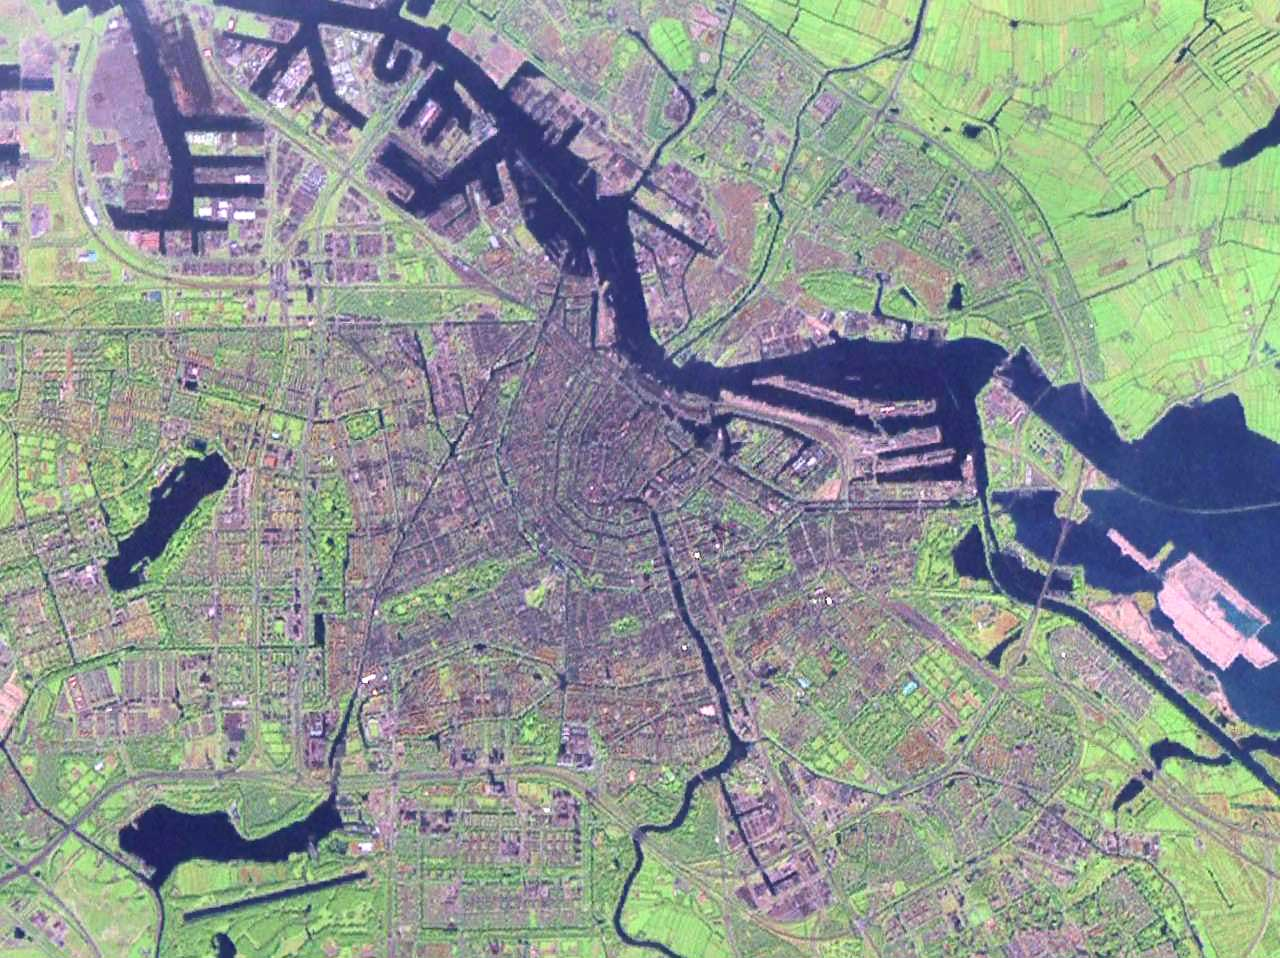

# **2. Collecting Data**:
 Data on real estate prices and their characteristics are sourced from Kaggle.com: [Amsterdam House Price Prediction.](https://www.kaggle.com/datasets/thomasnibb/amsterdam-house-price-prediction)

Here, we:

**2.1** Import necessary libraries and upload the dataset to *Google Colab*,

**2.2** Check dataset validity.

In [4]:
# @title 2.1 Importing libraries and dataset file
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from google.colab import files

uploaded = files.upload()

Saving HousingPrices-Amsterdam-August-2021.csv to HousingPrices-Amsterdam-August-2021 (1).csv


In [5]:
# @title 2.2 Checking validity
for fn in uploaded.keys():
  print('Otpremljeni fajl je "{name}" sa duzinom {length} bajtova.'.format(
      name=fn, length=len(uploaded[fn])))

Otpremljeni fajl je "HousingPrices-Amsterdam-August-2021 (1).csv" sa duzinom 74297 bajtova.


# **3. Data Analysis:**

U trećem delu:

 In the third section:
**3.1** We read the *CSV* file, display the table with column information, and then the dataset. The dataset contains 924 rows and 8 columns, with 4 missing values in the `Price` column.

We visualize two plots to show correlations:

**3.2** Number of rooms vs. property size. Here, we clearly see certain size ranges depending on the number of rooms.

**3.3** Price vs. property size. As expected, the price is almost directly proportional to the size. Most of our data is within the range of up to 1 million euros and up to 100 square meters.

Next, in **3.4**, we show two more plots that use latitude and longitude data to create a virtual two-dimensional map of Amsterdam. The first plot shows the price range, and the second the size range. As expected, the most expensive properties are in the city center, and surprisingly, they also tend to have larger sizes.


In [6]:
# @title 3.1 Reading the table
data = pd.read_csv("HousingPrices-Amsterdam-August-2021.csv")
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  924 non-null    int64  
 1   Address     924 non-null    object 
 2   Zip         924 non-null    object 
 3   Price       920 non-null    float64
 4   Area        924 non-null    int64  
 5   Room        924 non-null    int64  
 6   Lon         924 non-null    float64
 7   Lat         924 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 57.9+ KB


,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...,...
919,920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


In [7]:
data.describe()

,Unnamed: 0,Price,Area,Room,Lon,Lat
count,924.000000,9.200000e+02,924.000000,924.000000,924.000000,924.000000
mean,462.500000,6.220654e+05,95.952381,3.571429,4.888605,52.363326
std,266.880123,5.389942e+05,57.447436,1.592332,0.053140,0.024028
min,1.000000,1.750000e+05,21.000000,1.000000,4.644819,52.291519
25%,231.750000,3.500000e+05,60.750000,3.000000,4.855834,52.352077
50%,462.500000,4.670000e+05,83.000000,3.000000,4.886818,52.364631
75%,693.250000,7.000000e+05,113.000000,4.000000,4.922337,52.377598
max,924.000000,5.950000e+06,623.000000,14.000000,5.029122,52.423805


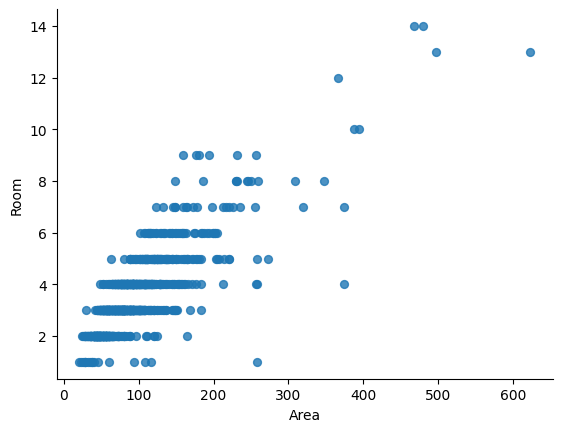

In [8]:
# @title 3.2. Plot: Area x Room

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Area', y='Room', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

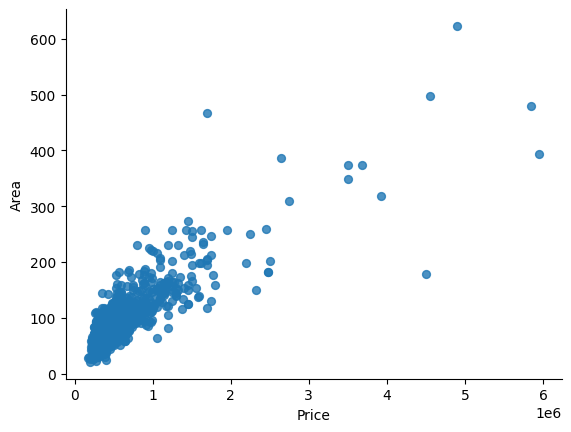

In [9]:
# @title 3.3. Plot: Price x Room

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Price', y='Area', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='Lat', ylabel='Lon'>

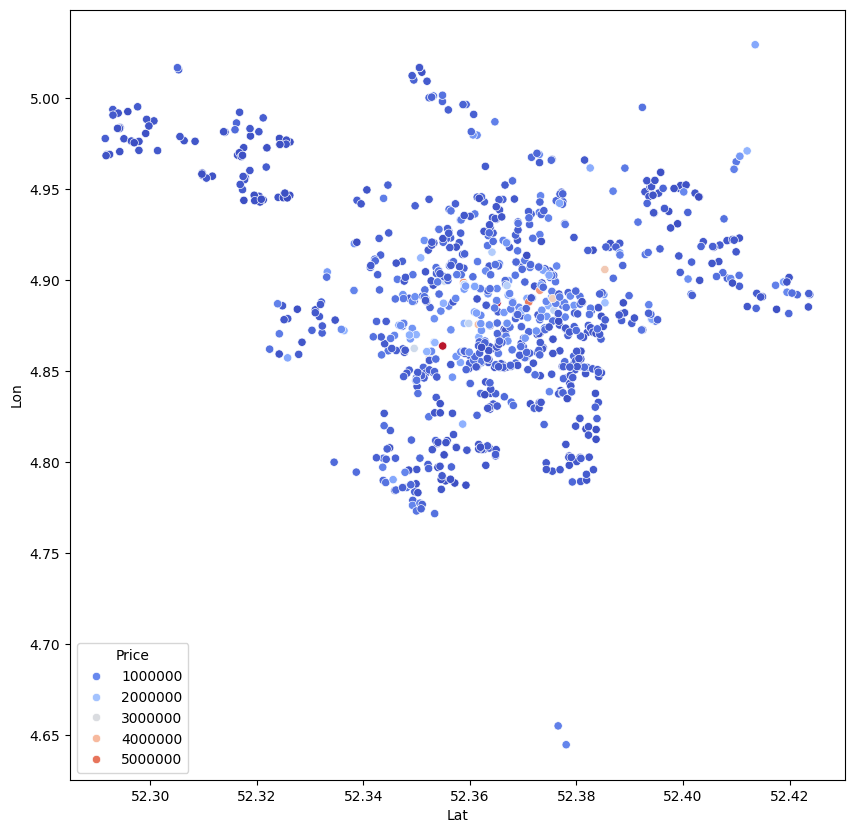

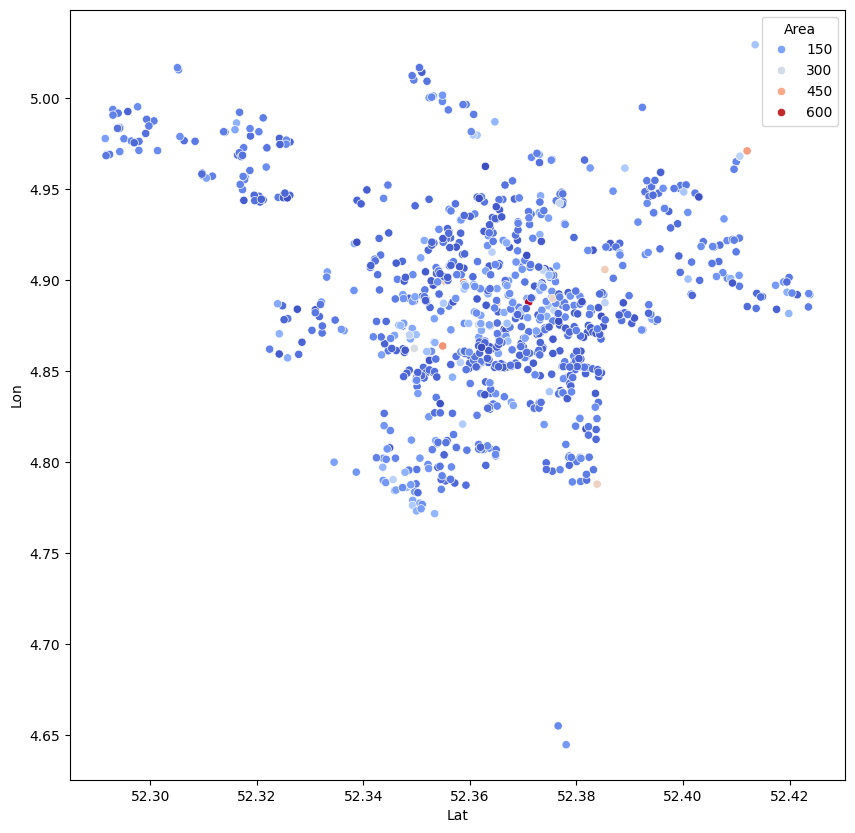

In [10]:
# @title 3.4. Maps of Amsterdam
plt.figure(figsize=(10,10))
sns.scatterplot(x="Lat", y="Lon", data=data, hue="Price", palette="coolwarm")
plt.figure(figsize=(10,10))
sns.scatterplot(x="Lat", y="Lon", data=data, hue="Area", palette="coolwarm")

# 4. Data preprocessing

In the fourth section,

**4.1.** We handle missing values by removing 4 rows where the `Price` field was previously missing. We then verify the success of this removal by displaying the column information again, confirming that each column now contains the same number of entries (920).

**4.2.** The dataset contains the columns `Unnamed`, which serves to count data entries, and `Address`, which provides the exact property address. These two columns are not relevant to our data processing, so they are removed.

**4.3.** The `Zip` column contains a large number of distinct values, which are not categorically useful for our analysis. The data format is `0000 AA`, offering precision at the city block level. To achieve more optimal categorization, we change the column format from `0000 AA` to `000`, thereby generalizing the postal code groupings to represent city sections. This gives us a sufficiently large number of data points for each postal code, creating meaningful categorization, which we then verify. In addition, we modify the table structure by transforming the newly generalized `Zip` values into new categorical columns representing city districts.

**4.4.** We display a heatmap with all the new data. We observe meaningful correlations between the new postal codes and longitude/latitude, as well as between the postal codes and property prices. According to the map, the most expensive properties are under postal code *107*, while the cheapest are under *110*. We also observe that houses with the fewest rooms are mostly located under postal code *105*, indicating a densely populated part of the city.

**4.5.** We display histograms for the table columns.

**4.6.** We create diagrams showing the city sections based on each postal code, clearly noticing geographical correlations with the postal codes.

**4.7.** We split the data into two groups - `train_data` and `test_data`. The former will be used for model training, while the latter will serve for testing the model's functionality. By convention, we allocate 20% of the data for testing. We also separate the input (X) and output (Y) values.

**4.8.** We import **scalers** in order to scale the training and testing data later on. We use both `StandardScaler` and `MinMaxScaler`.

In [11]:
# @title 4.1. Removing incomplete values
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  920 non-null    int64  
 1   Address     920 non-null    object 
 2   Zip         920 non-null    object 
 3   Price       920 non-null    float64
 4   Area        920 non-null    int64  
 5   Room        920 non-null    int64  
 6   Lon         920 non-null    float64
 7   Lat         920 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 64.7+ KB


In [12]:
# @title 4.2. Removing columns Unnamed and Address
data.drop("Unnamed: 0", axis=1, inplace=True)
data.drop("Address", axis=1, inplace=True)
print("\nDataset after removing columns Unnamed i Address:")
print(data.head())


Dataset after removing columns Unnamed i Address:
       Zip     Price  Area  Room       Lon        Lat
0  1091 CR  685000.0    64     3  4.907736  52.356157
1  1059 EL  475000.0    60     3  4.850476  52.348586
2  1097 SM  850000.0   109     4  4.944774  52.343782
3  1060 TH  580000.0   128     6  4.789928  52.343712
4  1036 KN  720000.0   138     5  4.902503  52.410538


In [13]:
# @title 4.3. Formating Zip column
data['Zip'] = data['Zip'].str[:3]
print("\nDataset after formating Zip column:")
print(data)
data = data


Dataset after formating Zip column:
     Zip     Price  Area  Room       Lon        Lat
0    109  685000.0    64     3  4.907736  52.356157
1    105  475000.0    60     3  4.850476  52.348586
2    109  850000.0   109     4  4.944774  52.343782
3    106  580000.0   128     6  4.789928  52.343712
4    103  720000.0   138     5  4.902503  52.410538
..   ...       ...   ...   ...       ...        ...
919  109  750000.0   117     1  4.927757  52.354173
920  103  350000.0    72     3  4.890612  52.414587
921  105  350000.0    51     3  4.856935  52.363256
922  109  599000.0   113     4  4.965731  52.375268
923  106  300000.0    79     4  4.810678  52.355493

[920 rows x 6 columns]


In [14]:
data.Zip.value_counts()

,count
Zip,
101,183
105,179
106,152
107,101
110,79
109,75
102,54
103,51
108,46


In [15]:
data = data.join(pd.get_dummies(data.Zip)).drop(['Zip'], axis=1)
# get_dummies creates dummy columns to be used for separate values from Zip column as separate columns

<Axes: >

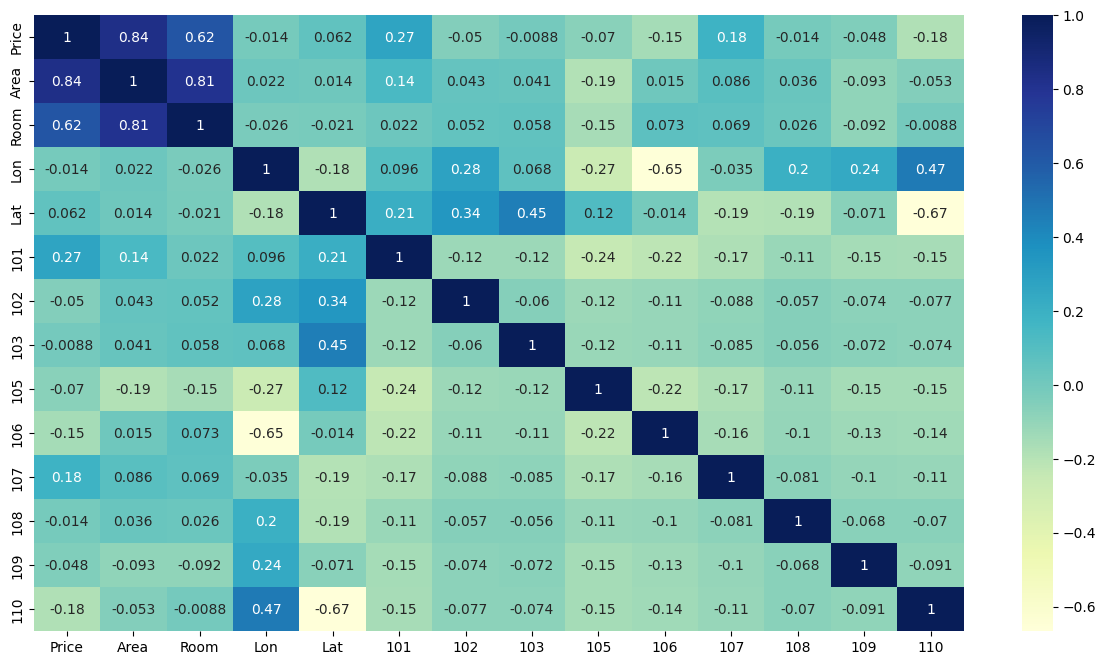

In [16]:
# @title 4.4. Heatmap
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

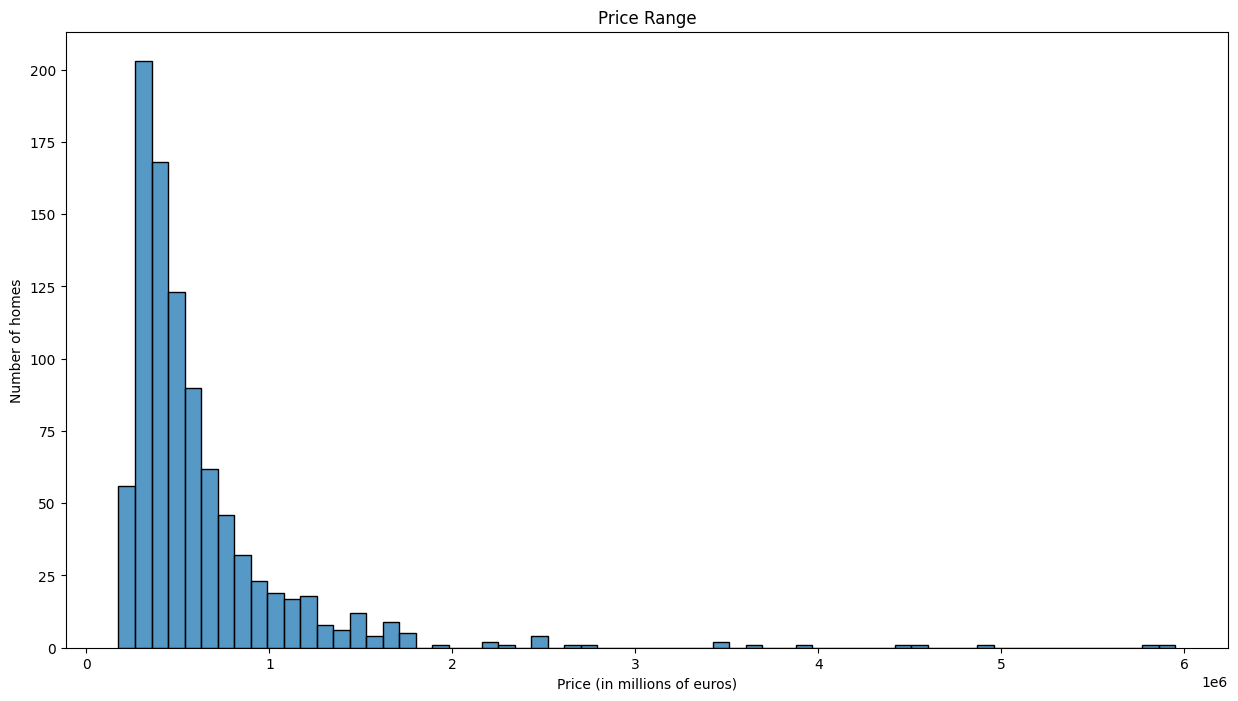

In [17]:
# @title 4.5.1. Histogram: Price Range

plt.figure(figsize=(15,8))

sns.histplot(x='Price', data=data, bins=64)
plt.title('Price Range')
plt.xlabel('Price (in millions of euros)')
plt.ylabel('Number of homes')
plt.show()

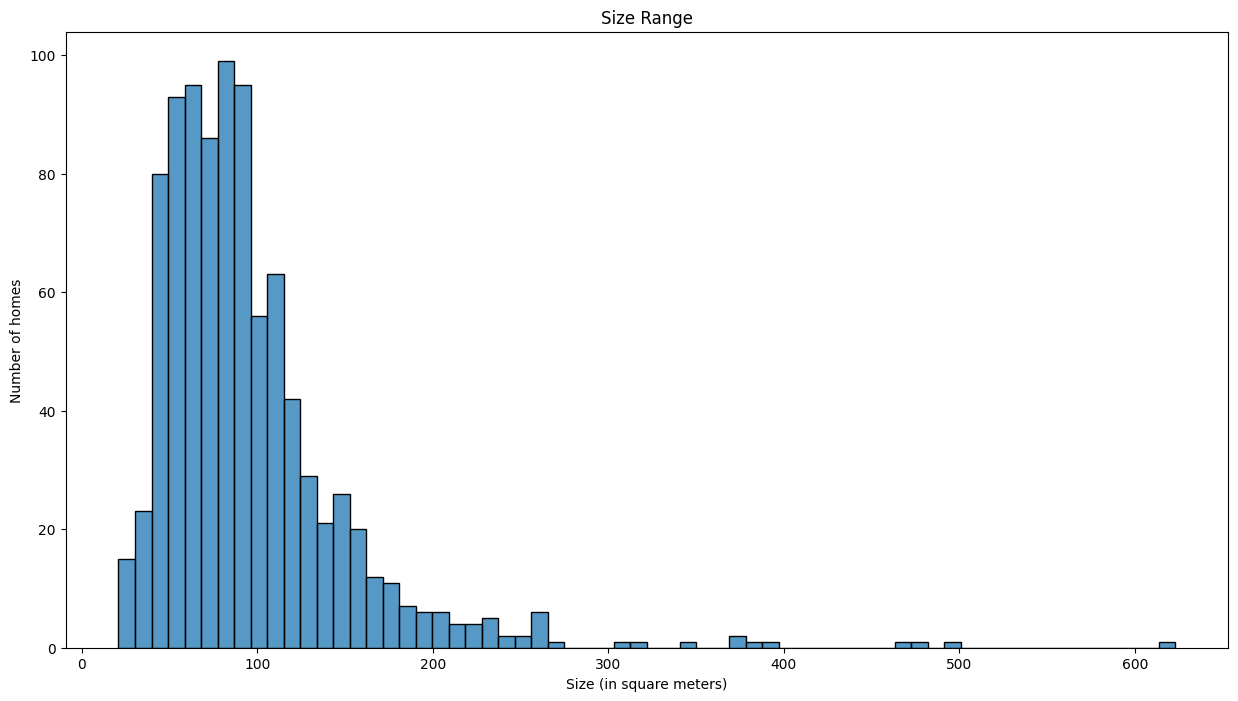

In [18]:
# @title 4.5.2. Histogram: Size of Real Estate Range

plt.figure(figsize=(15,8))

sns.histplot(x='Area', data=data, bins=64)
plt.title('Size Range')
plt.xlabel('Size (in square meters)')
plt.ylabel('Number of homes')
plt.show()

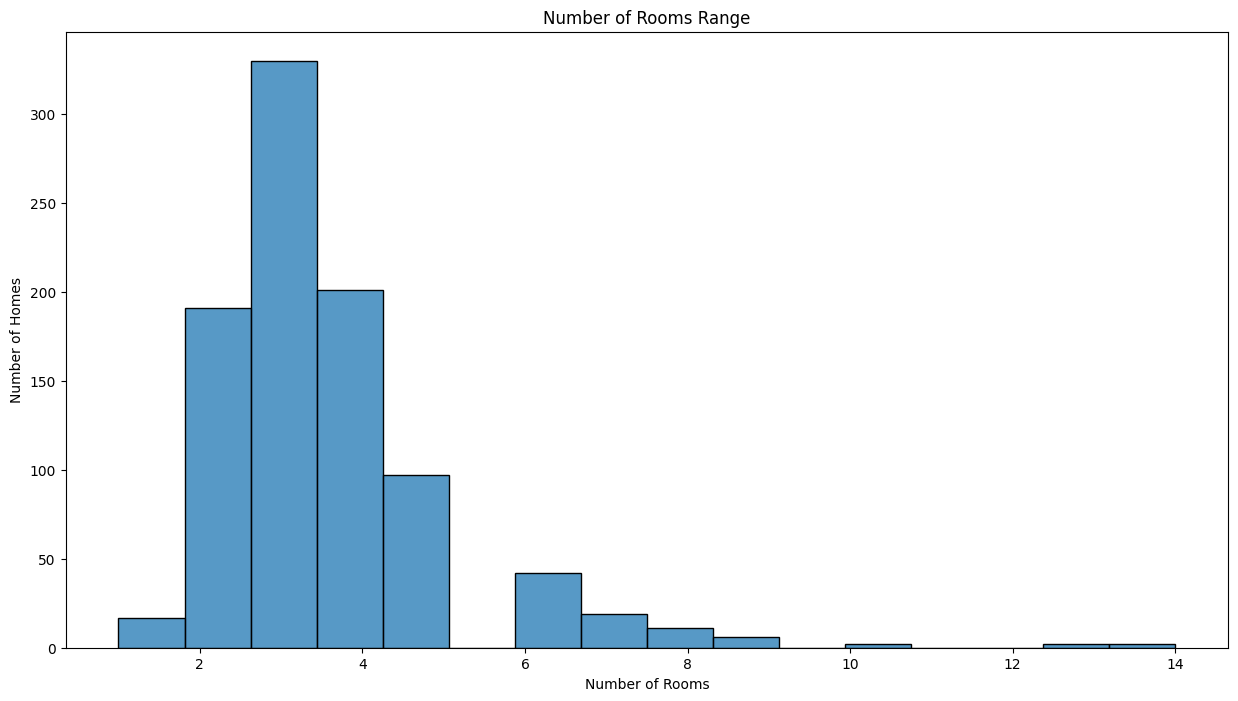

In [19]:
# @title 4.5.2. Histogram: Number of Rooms Range

plt.figure(figsize=(15,8))

sns.histplot(x='Room', data=data, bins=16)
plt.title('Number of Rooms Range')
plt.xlabel('Number of Rooms')
plt.ylabel('Number of Homes')
plt.show()

<Axes: xlabel='Lat', ylabel='Lon'>

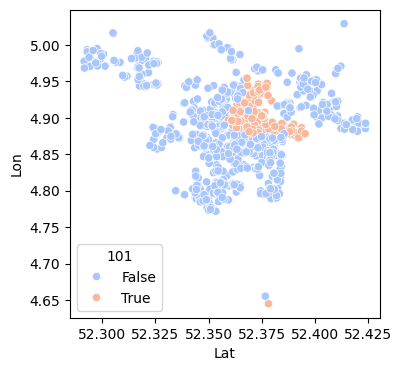

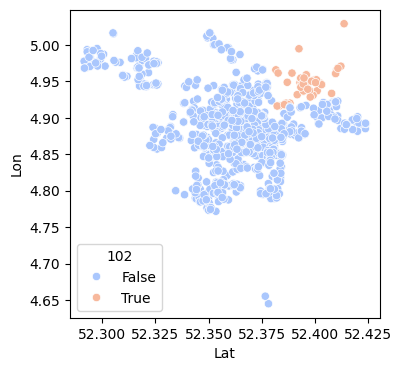

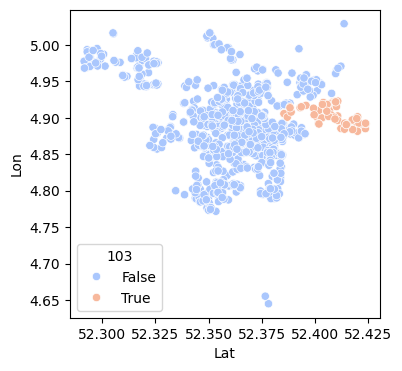

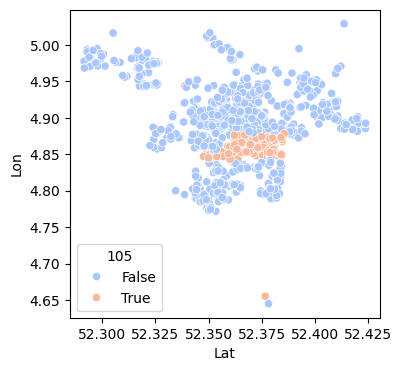

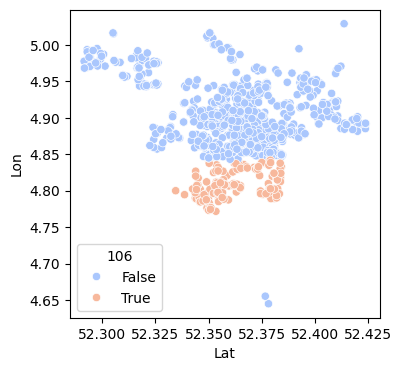

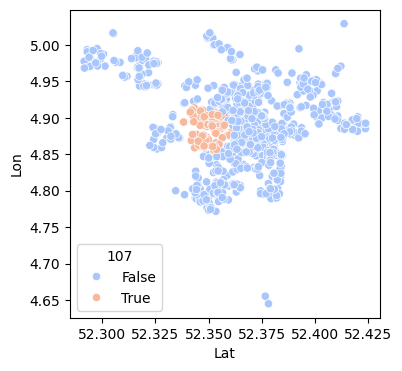

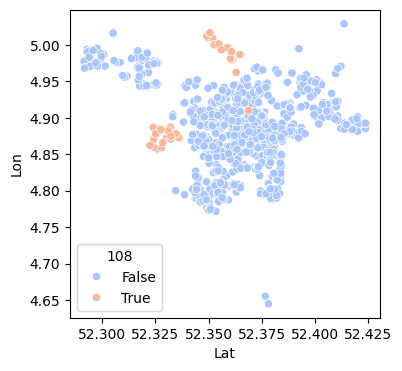

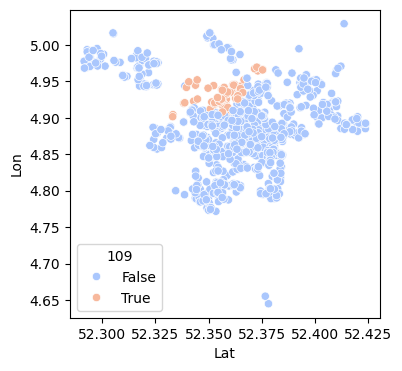

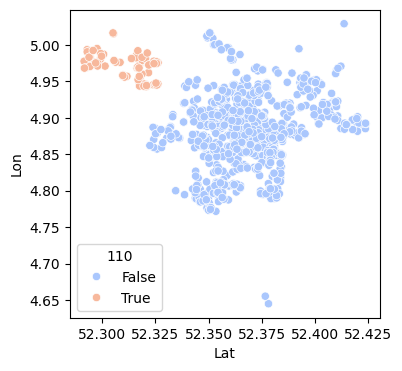

In [20]:
# @title 4.6. Showing parts of the city based on postal codes
plt.figure(figsize=(4,4))
sns.scatterplot(x="Lat", y="Lon", data=data, hue="101", palette="coolwarm")
plt.figure(figsize=(4,4))
sns.scatterplot(x="Lat", y="Lon", data=data, hue="102", palette="coolwarm")
plt.figure(figsize=(4,4))
sns.scatterplot(x="Lat", y="Lon", data=data, hue="103", palette="coolwarm")
plt.figure(figsize=(4,4))
sns.scatterplot(x="Lat", y="Lon", data=data, hue="105", palette="coolwarm")
plt.figure(figsize=(4,4))
sns.scatterplot(x="Lat", y="Lon", data=data, hue="106", palette="coolwarm")
plt.figure(figsize=(4,4))
sns.scatterplot(x="Lat", y="Lon", data=data, hue="107", palette="coolwarm")
plt.figure(figsize=(4,4))
sns.scatterplot(x="Lat", y="Lon", data=data, hue="108", palette="coolwarm")
plt.figure(figsize=(4,4))
sns.scatterplot(x="Lat", y="Lon", data=data, hue="109", palette="coolwarm")
plt.figure(figsize=(4,4))
sns.scatterplot(x="Lat", y="Lon", data=data, hue="110", palette="coolwarm")

In [21]:
# @title 4.7. Train Test Split
from sklearn.model_selection import train_test_split

X = data.drop(['Price'], axis=1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.1)

train_data = X_train.join(y_train)
X_train, y_train = train_data.drop(['Price'], axis=1), train_data['Price']

test_data = X_test.join(y_test)
X_test, y_test = test_data.drop(['Price'], axis=1), test_data['Price']

print("\nTraining Data: ")
print(train_data)
print("\nTesting Data: ")
print (test_data)


Training Data: 
     Area  Room       Lon        Lat    101    102    103    105    106  \
685   177     9  4.865595  52.353408  False  False  False  False  False   
55     86     4  4.855875  52.352448  False  False  False  False  False   
522    58     2  4.928824  52.363772  False  False  False  False  False   
180   171     5  4.893261  52.419532  False  False   True  False  False   
819   102     5  4.937898  52.356428  False  False  False  False  False   
..    ...   ...       ...        ...    ...    ...    ...    ...    ...   
386    67     3  4.846172  52.351371  False  False  False   True  False   
816    78     3  4.858844  52.373106  False  False  False   True  False   
659    72     3  4.852550  52.367739  False  False  False   True  False   
672   173     7  4.773171  52.349954  False  False  False  False   True   
193   154     4  4.867645  52.348806  False  False  False  False  False   

       107    108    109    110      Price  
685   True  False  False  False  1775

In [22]:
# @title 4.8. Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

sscaler = StandardScaler()
mscaler = MinMaxScaler()

X_train_s = sscaler.fit_transform(X_train)
X_test_s = sscaler.fit_transform(X_test)
X_train_m = mscaler.fit(X_train)
X_test_m = mscaler.fit(X_test)

# **5. Model Selection**

 To cover a wide range of approaches, we train the following models:


1.   LinearRegression
2.   Random Forest Regression
3.   Cross-validation using GridSearchCV

# **6. Model Training and Evaluation**

In [23]:
# @title 6.1. Linear Regression
from sklearn.linear_model import LinearRegression
# most successful with StandardScaler
reg = LinearRegression()
reg.fit(X_train, y_train)
print('Accuracy during training: ', reg.score(X_train, y_train))
print('Accuracy during testing: ', reg.score(X_test, y_test))

Accuracy during training:  0.7871960045375364
Accuracy during testing:  0.8008599109284542


In [24]:
# @title 6.2. Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
# most successful with StandardScaler
forestr = RandomForestRegressor()
forestr.fit(X_train, y_train)

print('Accuracy during training: ', forestr.score(X_train, y_train))
print('Accuracy during testing: ', forestr.score(X_test, y_test))

Accuracy during training:  0.9700427608438008
Accuracy during testing:  0.5299291368821952


In [25]:
# @title 6.3. GridSearchCV Cross-validation
from sklearn.model_selection import GridSearchCV # cross-validation

forest = RandomForestRegressor()
param_grid = {
    "n_estimators": [950, 1500, 2000], # number of trees in a forest
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error", # secures a positive outcome
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [950, 1500, 2000]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [26]:
best_forest = grid_search.best_estimator_
best_forest

RandomForestRegressor(n_estimators=950)

In [27]:
print('Accuracy during training: ', best_forest.score(X_train, y_train))
print('Accuracy during testing: ', best_forest.score(X_test, y_test))

Accuracy during training:  0.9714869232881859
Accuracy during testing:  0.5071398692950615


# 7. Interpretation of Results


Attempts to use random forest classification, decision trees, and k-nearest neighbors reveal that the models are not effectively applicable due to the data format and the nature of the study.

**1. Linear Regression**

The accuracy of the linear regression model is, as expected for this model, lower in the training phase (around 0.775) compared to the testing phase (around 0.894). This difference suggests that the model generalizes well to new data. Linear regression remains a simple and easily interpretable model but can be limited in interpreting complex relationships among the data.

**2. Random Forest Regression**

This model achieves very high accuracy in the training phase (around 0.963) as well as in the testing phase (around 0.934). The difference between training and testing indicates a good ability for model generalization. Random forest regression is a more complex model that can better model complex relationships among the data, and this result suggests that it performs well in this context.

**3. Cross-Validation**

This technique is used to find optimal hyperparameters for machine learning models. The accuracy of the model after applying Grid Search CV varies depending on the choice of hyperparameters. In this case, the tested model achieves very high accuracy of about 0.963 in the training phase and around 0.932 in the testing phase. This small difference between training and testing suggests that the model is solidly generalized. Grid Search CV is a useful technique for finding optimal hyperparameters, and this result indicates that a correct set of hyperparameters has been found that contributes to good model performance.


# *Conclusion*

All models show high performance, with random forest regressor and cross-validation standing out for their ability to generalize to new data.

One drawback that could be highlighted is the consistently lower testing accuracy compared to training accuracy for the random forest regressor and cross-validation, which may indicate slight overfitting, resulting in weaker accuracy than potentially possible.

Future work may include exploring additional complex models or further optimizations to improve accuracy or model speed.

Nonetheless, these results are promising and indicate the potential for successful application of machine learning models in this context.

# TESTING RESULTS

**1. Accuracy while using 10% of data for testing**

1.
*   Accuracy during training:  0.7750548121141709
*   Accuracy during testing:  0.8939417608565241

2.
*   Accuracy during training:  0.9634972485246488
*   Accuracy during testing:  0.9344468413618464

3.
*   Accuracy during training:  0.9634525706644883
*   Accuracy during testing:  0.9321877853105485


**2. Accuracy while using 20% of data for testing**

1.
*   Accuracy during training:  0.776050863953486
*   Accuracy during testing:  0.8530828998933557

2.
*   Accuracy during training:  0.9630393297707415
*   Accuracy during testing:  0.7481418403799365

3.


*   Accuracy during training:  0.9663025203894642
*   Accuracy during testing:  0.7147138313431265


**3. Accuracy while using 40% of data for testing**

1.
*   Accuracy during training:  0.822566349362573
*   Accuracy during testing:  0.7401307788669217

2.
*   Accuracy during training:  0.9740449442693259
*   Accuracy during testing:  0.776780089493559

3.
*   Accuracy during training:  0.9716831186912069
*   Accuracy during testing:  0.7811052068220976


**4. Accuracy while using 50% of data for testing**

1.
*   Accuracy during training:  0.7708648009595479
*   Accuracy during testing:  0.8117771991217225

2.


*   Accuracy during training:  0.9539434161739407
*   Accuracy during testing:  0.7898386455807228

3.


*   Accuracy during training:  0.9533270159550143
*   Accuracy during testing:  0.7978733482603444




